# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Linear SVM

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
features = iris['data']
target = iris['target']
df = pd.DataFrame(features, columns = iris['feature_names'])
df['target'] = target

X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [3]:
from sklearn.svm import SVC


svm = SVC(kernel = 'linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

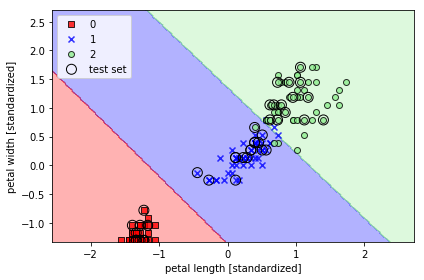

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_regions(x, y, classifier, test_idx = None, resolution=0.02):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[ : len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:,0].max() + 1
    x2_min, x2_max = x[ : 1].min(), x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                           np.arange(x2_min, x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0],
                    y = x[y == cl, 1],
                    alpha=0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
    
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        
        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c = '',
                    edgecolor = 'black',
                    alpha=1.0,
                    linewidth=1,
                    marker = 'o',
                    s=100,
                    label = 'test set')


plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Kernel SVM

In [6]:
from sklearn.datasets import load_wine
import numpy as np


wine = load_wine()
x = wine['data'][:, :2]
y = wine['target']
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [7]:
from sklearn.svm import SVC

c=1
models = (SVC(kernel = 'linear', C = c),
        SVC(kernel = 'rbf', gamma=0.7, C = c),
        SVC(kernel = 'poly', degree=3, C = c))
models = (clf.fit(x, y) for clf in models)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


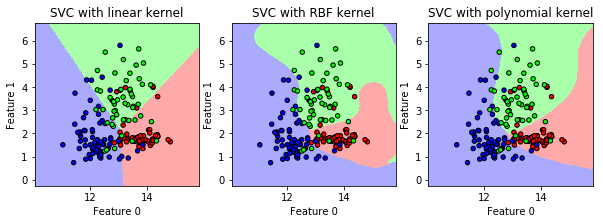

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


titles = ('SVC with linear kernel',
        'SVC with RBF kernel',
        'SVC with polynomial kernel')

fig, sub = plt.subplots(1, 3, figsize = (10,3))

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

x_min, x_max = x[:,0].min()-1, x[:,0].max() + 1
y_min, y_max = x[:,1].min()-1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for clf, title, ax in zip(models, titles, sub.flatten()):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, z, cmap = cmap_light)
    ax.scatter(x[:, 0], x[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s=20)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_title(title)
    
plt.show()

# Hypetuning for rbf

In [9]:
from sklearn.svm import SVC


c=1
models = (SVC(kernel = 'rbf', gamma=0.1, C = c),
          SVC(kernel = 'rbf', gamma=1, C = c),
          SVC(kernel = 'rbf', gamma=10, C = c))
models = (clf.fit(x, y) for clf in models)

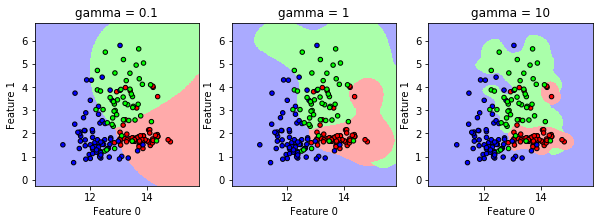

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


titles = ('gamma = 0.1', 'gamma = 1', 'gamma = 10')

fig, sub = plt.subplots(1, 3, figsize = (10, 3))

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for clf, title, ax in zip(models, titles,sub.flatten()):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, z, cmap = cmap_light)
    ax.scatter(x[:, 0], x[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s=20)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_title(title)
    
plt.show()

# SVR

In [11]:
from sklearn.datasets import load_boston


boston = load_boston()
x, y = boston.data, boston.target

In [12]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)

### 未標準化

* 時間較久
* 準確率低

In [13]:
from sklearn.svm import SVR


for kernel in ['linear', 'rbf']:
    svr = SVR(kernel = kernel)
    svr.fit(x_train, y_train)
    print(kernel, 'train/test score: %.3f/%.3f'
          %(svr.score(x_train, y_train), svr.score(x_test, y_test)))

linear train/test score: 0.709/0.696
rbf train/test score: 0.145/0.001


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 標準化

In [14]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [15]:
from sklearn.svm import SVR


for kernel in ['linear', 'rbf']:
    svr = SVR(kernel = kernel)
    svr.fit(x_train_std, y_train)
    print(kernel, 'train/test score: %.3f/%.3f'
          %(svr.score(x_train_std, y_train), svr.score(x_test_std, y_test)))

linear train/test score: 0.706/0.698
rbf train/test score: 0.665/0.695
